Baseline experiment of BatchNormalization usage for a CNN.

In [1]:
# load the mltb lib - see here: https://github.com/PhilipMay/mltb
!pip install mltb==0.0.14

In [2]:
import mltb
import numpy as np
from keras.datasets import mnist
from keras.utils import to_categorical
from keras import models
from keras import layers
from keras.callbacks import EarlyStopping

%matplotlib inline

Using TensorFlow backend.


In [3]:
# load MNIST data
(train_images, train_labels), (val_images, val_labels) = mnist.load_data()

In [4]:
# show shape of data
print("train_images.shape:", train_images.shape)
print("train_labels.shape:", train_labels.shape)
print("val_images.shape:", val_images.shape)
print("val_labels.shape:", val_labels.shape)

train_images.shape: (60000, 28, 28)
train_labels.shape: (60000,)
val_images.shape: (10000, 28, 28)
val_labels.shape: (10000,)


In [5]:
# one hot encode the labels
train_labels = to_categorical(train_labels)
val_labels = to_categorical(val_labels)

In [6]:
# normalization (min-max scaling) to 0 to 1
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

val_images = val_images.reshape((10000, 28, 28, 1))
val_images = val_images.astype('float32') / 255

In [7]:
#network without BatchNormalization
def network_a():
    network = models.Sequential()
    network.add(layers.Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1)))
    network.add(layers.Activation('relu'))    
    network.add(layers.Conv2D(64, (3, 3)))
    network.add(layers.Activation('relu'))        
    network.add(layers.MaxPooling2D(pool_size=(2, 2)))
    network.add(layers.Dropout(0.25))
    network.add(layers.Flatten())
    network.add(layers.Dense(128))
    network.add(layers.Activation('relu'))
    network.add(layers.Dropout(0.5))
    network.add(layers.Dense(10, activation='softmax'))
    return network


In [8]:
#network with BatchNormalization
def network_b():
    network = models.Sequential()
    network.add(layers.Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1)))
    network.add(layers.BatchNormalization())
    network.add(layers.Activation('relu'))    
    network.add(layers.Conv2D(64, (3, 3)))
    network.add(layers.BatchNormalization())
    network.add(layers.Activation('relu'))        
    network.add(layers.MaxPooling2D(pool_size=(2, 2)))
    network.add(layers.Dropout(0.25))
    network.add(layers.Flatten())
    network.add(layers.Dense(128))
    network.add(layers.BatchNormalization())
    network.add(layers.Activation('relu'))
    network.add(layers.Dropout(0.5))
    network.add(layers.Dense(10, activation='softmax'))
    return network    


In [9]:
# print summary representation of network a
network_a().summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 24, 24, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
__________

In [10]:
# print summary representation of network b
network_b().summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
activation_4 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 64)        256       
_________________________________________________________________
activation_5 (Activation)    (None, 24, 24, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
__________

In [11]:
# create the different networks, fit them and return results
def fit(value):
    network = None
    
    if value == 'a':
        network = network_a()
    if value == 'b':
        network = network_b()
        
    network.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
 
    es = EarlyStopping(monitor='val_acc', patience=5, mode='max')
    
    history = network.fit(train_images, train_labels, 
                          validation_data=(val_images, val_labels), 
                          epochs=100, 
                          callbacks=[es],
                          verbose=0,
                          batch_size=128)
    
    best_val_acc = max(history.history['val_acc'])
    
    best_val_acc_epoch = history.history['val_acc'].index(best_val_acc) + 1
    
    return {'best_val_acc' : best_val_acc, 'best_val_acc_epoch' : best_val_acc_epoch}

In [12]:
# dict with call params
param_dict = {'CNN + RELU' : 'a', 
              'CNN + RELU + BN' : 'b', 
             }

# fit the networks many times and return the result
# see here: https://github.com/PhilipMay/mltb/blob/master/mltb/tools.py
result = mltb.tools.multi_param_call(fit, param_dict, 41)

Done with CNN + RELU                                
Done with CNN + RELU + BN                           
100%|██████████| 82/82 [3:14:19<00:00, 155.74s/it]


In [13]:
#print the result
print(result)

{'best_val_acc': {'CNN + RELU': [0.9935, 0.9933, 0.9927, 0.9923, 0.9931, 0.9941, 0.9918, 0.9928, 0.993, 0.9927, 0.993, 0.9931, 0.9934, 0.9918, 0.993, 0.992, 0.9935, 0.9925, 0.9929, 0.993, 0.9929, 0.9929, 0.9934, 0.9937, 0.9931, 0.9925, 0.9936, 0.9932, 0.9933, 0.9929, 0.9929, 0.9931, 0.9945, 0.9935, 0.9926, 0.9916, 0.9935, 0.9924, 0.9923, 0.992, 0.9927], 'CNN + RELU + BN': [0.9933, 0.9917, 0.9935, 0.9929, 0.9931, 0.9929, 0.9925, 0.9937, 0.9924, 0.993, 0.993, 0.992, 0.9927, 0.9917, 0.9929, 0.9923, 0.9918, 0.9929, 0.9929, 0.9923, 0.9929, 0.9921, 0.9936, 0.9929, 0.9922, 0.9929, 0.9936, 0.9925, 0.9926, 0.9933, 0.9917, 0.9926, 0.9919, 0.9924, 0.9943, 0.9925, 0.9932, 0.9928, 0.9929, 0.9923, 0.9923]}, 'best_val_acc_epoch': {'CNN + RELU': [16, 23, 16, 7, 13, 18, 8, 12, 10, 10, 13, 20, 17, 4, 11, 6, 26, 12, 18, 15, 12, 12, 15, 13, 12, 17, 19, 16, 19, 14, 17, 14, 22, 16, 11, 6, 20, 12, 10, 8, 11], 'CNN + RELU + BN': [13, 8, 23, 18, 16, 16, 12, 23, 14, 19, 10, 8, 14, 7, 11, 19, 12, 15, 18, 8, 7, 8

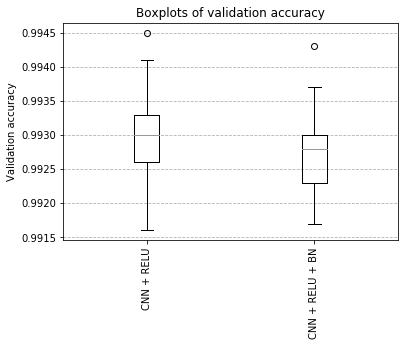

In [14]:
# print boxplots to compare validation accuracy
# see here: https://github.com/PhilipMay/mltb/blob/master/mltb/plot.py
mltb.plot.boxplot_dict(result['best_val_acc'], 
                       ylabel='Validation accuracy', 
                       title='Boxplots of validation accuracy'
                      )

In [15]:
# p-value for validation accuracy - can we reject the null hypothesis?
# see here: https://github.com/PhilipMay/mltb/blob/master/mltb/tools.py
print('p-value for best_val_acc:', mltb.tools.ttest_combinations(result['best_val_acc']))

p-value for best_val_acc: {('CNN + RELU', 'CNN + RELU + BN'): 0.09839389961544603}


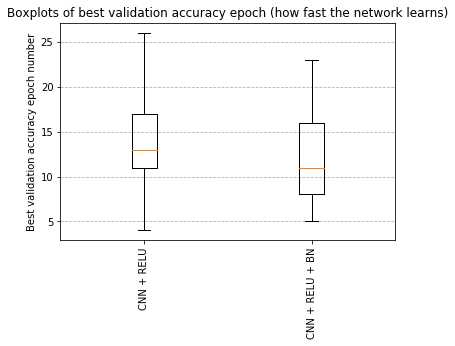

In [16]:
# print boxplots to compare wich epoch had the best validation accuracy (how fast the network learns)
# see here: https://github.com/PhilipMay/mltb/blob/master/mltb/plot.py
mltb.plot.boxplot_dict(result['best_val_acc_epoch'], 
                       ylabel='Best validation accuracy epoch number', 
                       title='Boxplots of best validation accuracy epoch (how fast the network learns)'
                      )

In [17]:
# p-value for best validation accuracy epoch - can we reject the null hypothesis?
# see here: https://github.com/PhilipMay/mltb/blob/master/mltb/tools.py
print('p-value for best_val_acc_epoch:', mltb.tools.ttest_combinations(result['best_val_acc_epoch']))

p-value for best_val_acc_epoch: {('CNN + RELU', 'CNN + RELU + BN'): 0.16223821476302605}
